# Ejemplo - Clustering

El conjunto de datos de flores de Iris, también conocido como conjunto de datos de Iris de Fisher, es un conjunto de datos multivariante introducido por el estadístico, eugenista y biólogo británico Ronald Fisher en su artículo de 1936, «El uso de múltiples mediciones en problemas taxonómicos como ejemplo de análisis discriminante lineal».

A veces se le llama conjunto de datos de Iris de Anderson, ya que Edgar Anderson recopiló los datos para cuantificar la variación morfológica de las flores de Iris de tres especies relacionadas.

Dos de las tres especies se recolectaron en la península de Gaspé, «todas del mismo pastizal, recogidas el mismo día y medidas al mismo tiempo por la misma persona con el mismo aparato». El artículo de Fisher se publicó en la revista Annals of Eugenics, lo que generó controversia sobre el uso actual del conjunto de datos de Iris para la enseñanza de técnicas estadísticas.

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor).

Se midieron cuatro características de cada muestra: la longitud y el ancho de los sépalos y pétalos, en centímetros.

A partir de la combinación de estas cuatro características, Fisher desarrolló un modelo discriminante lineal para distinguir las especies entre sí.

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

This study we try to clustering Iris Dataset used Kmeans

[Attribute Information:
](https://archive.ics.uci.edu/ml/datasets/iris)
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

import libraries

In [1]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

reading dataset

In [2]:
#
iris = pd.read_csv("IRIS.csv")

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#

x = iris.iloc[:, [0, 1, 2, 3]].values

x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
#
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#
iris[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
#
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

**Distribution plots**

plot each flower to a histogram

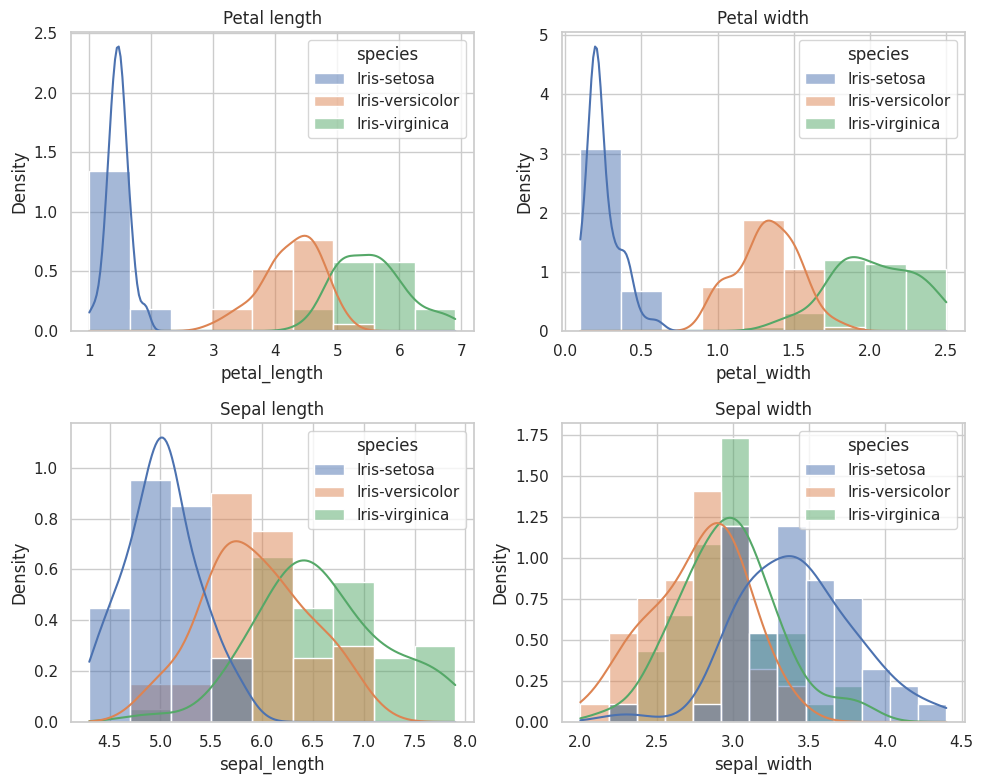

In [8]:
#
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

variables = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
titulos    = ["Petal length", "Petal width", "Sepal length", "Sepal width"]

for ax, var, title in zip(axes.ravel(), variables, titulos):
    sns.histplot(
        data=iris,
        x=var,
        hue="species",
        kde=True,            # curva de densidad
        stat="density",      # para que las alturas sean densidades
        common_norm=False,   # que no normalice por conjunto completo
        ax=ax,
        alpha=0.5
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

box plot

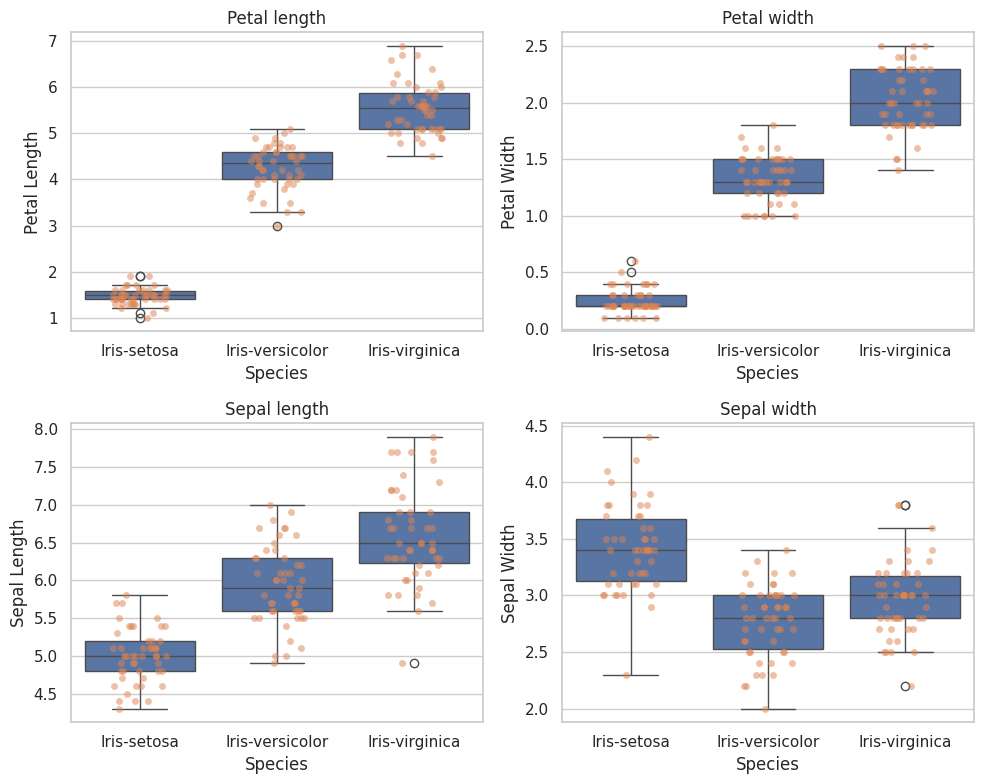

In [9]:
#
sns.set(style="whitegrid")

variables = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
titulos   = ["Petal length", "Petal width", "Sepal length", "Sepal width"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, var, title in zip(axes.ravel(), variables, titulos):
    sns.boxplot(
        data=iris,
        x="species",
        y=var,
        ax=ax
    )
    sns.stripplot(
        data=iris,
        x="species",
        y=var,
        ax=ax,
        dodge=False,
        alpha=0.5,
        jitter=0.2
    )
    ax.set_title(title)
    ax.set_xlabel("Species")
    ax.set_ylabel(var.replace("_", " ").title())

plt.tight_layout()
plt.show()

**Scatter plot**


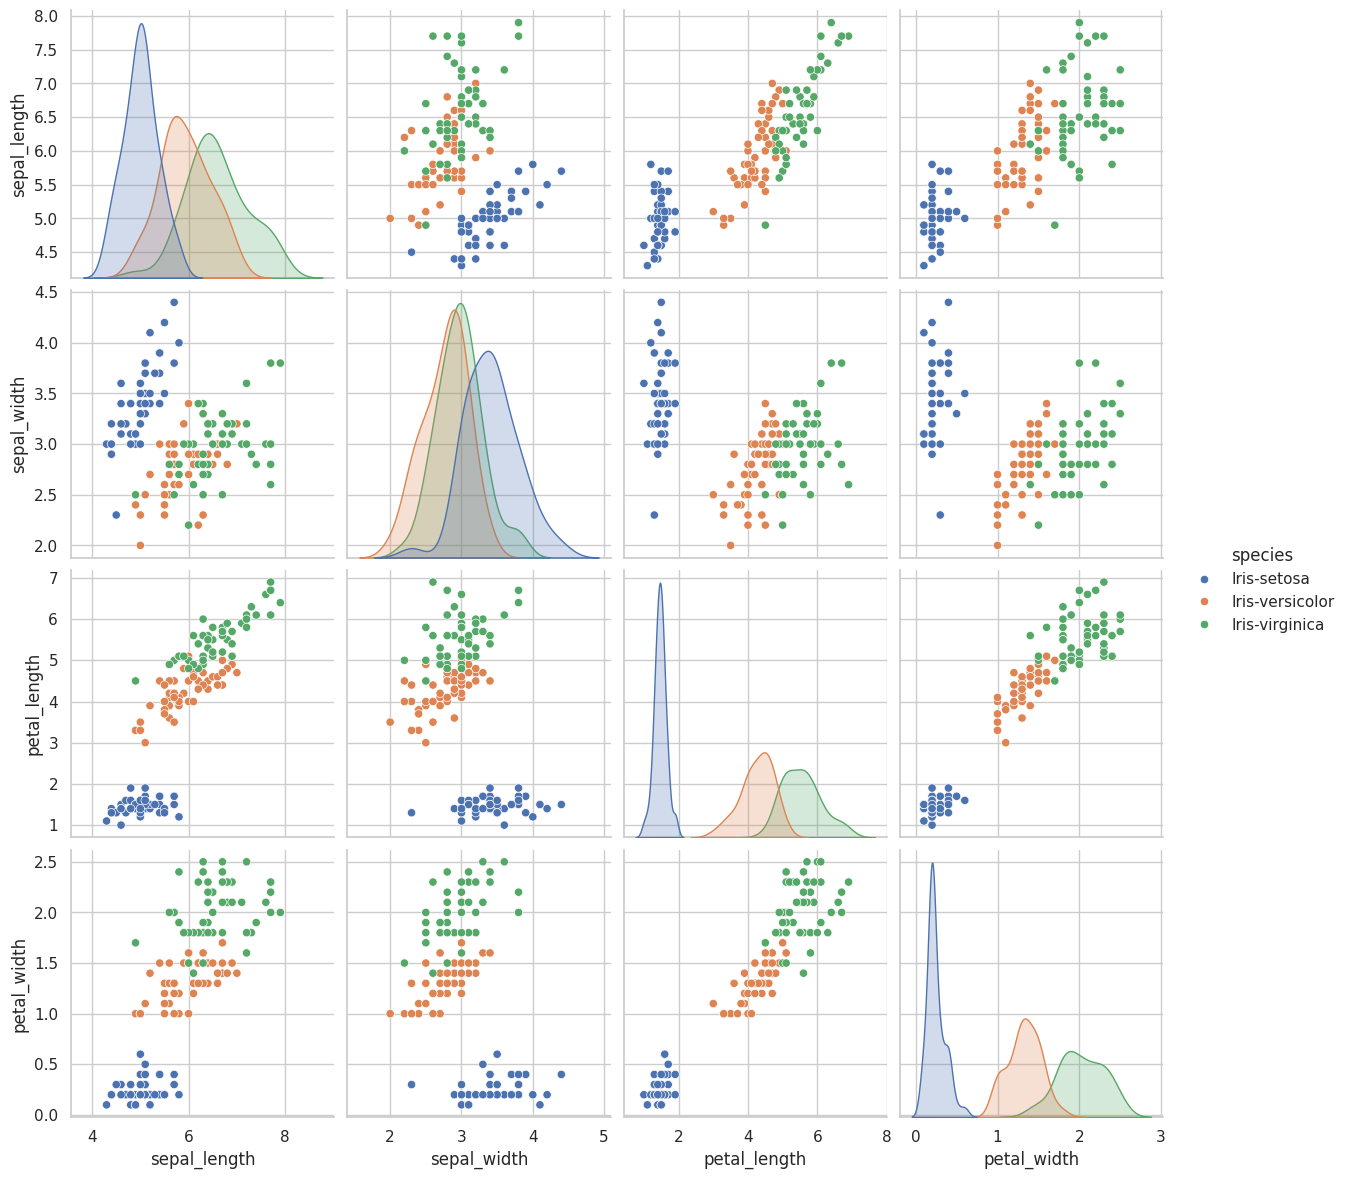

In [10]:
#
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3);
plt.show()

# K-Means

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

# How to Implementing K-Means Clustering ?

* Choose the number of clusters k
* Select k random points from the data as centroids
* Assign all the points to the closest cluster centroid
* Recompute the centroids of newly formed clusters
* Repeat steps 3 and 4


In [11]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans


In [12]:
# Ejemplo:
kmeans = KMeans(n_clusters = 2 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

kmeans.fit(x)

kmeans.inertia_

152.36870647733915

In [13]:
# Generalización

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means clustering


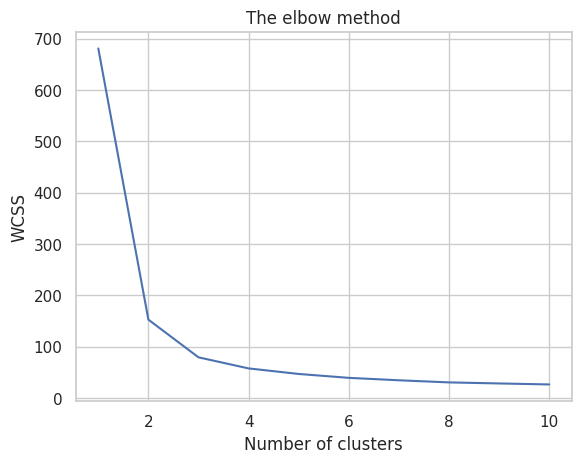

In [14]:
#
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Implementing K-Means Clustering

In [15]:
#
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

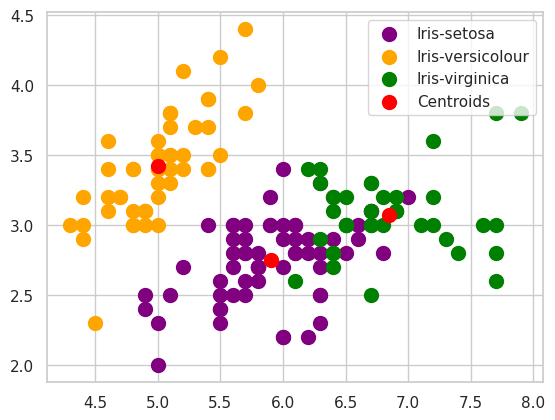

In [16]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

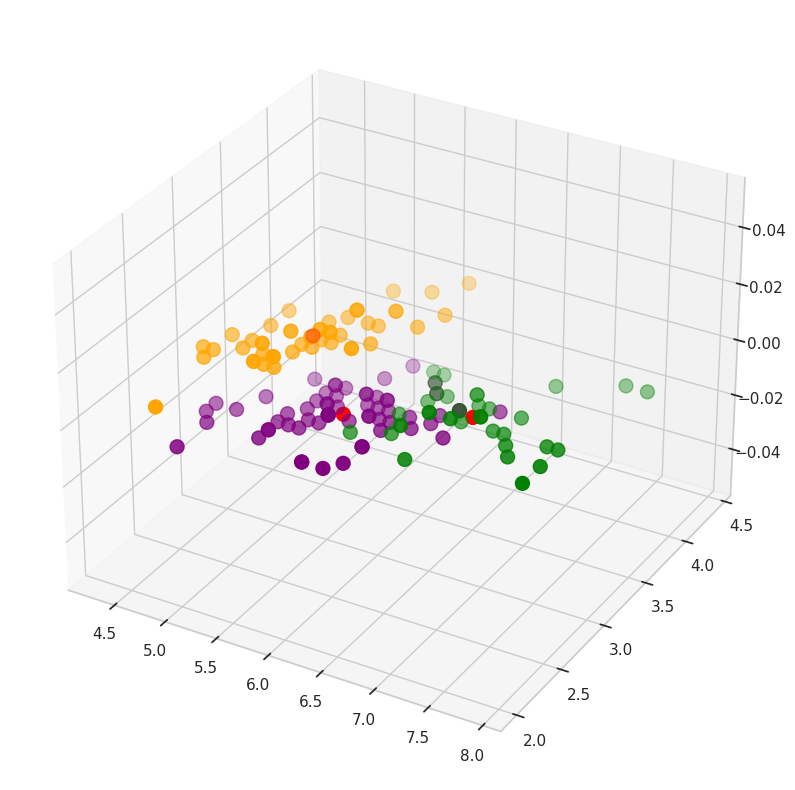

In [18]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()